In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [24]:
def imshow(img, title=""):
    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap="gray")
    _ = plt.yticks([])
    _ = plt.xticks([])
    plt.title(title)

In [71]:
def imagesc(img, title=""):
    plt.figure(figsize=(8, 8))
    img_rescaled = img / abs(img).max() + abs(img).max() * 0.5
#     print(img_rescaled)
    plt.imshow(img_rescaled, cmap="gray")
    _ = plt.yticks([])
    _ = plt.xticks([])
    plt.title(title)

In [64]:
img = cv2.imread("../images/pair-color.png")

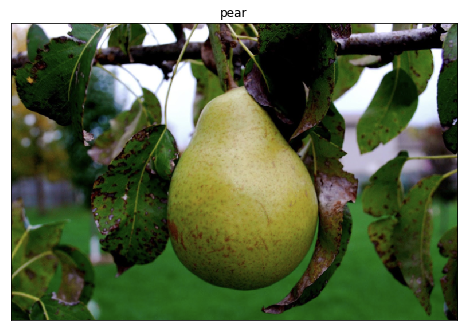

In [17]:
imshow(img[:,:,::-1], "pear")

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

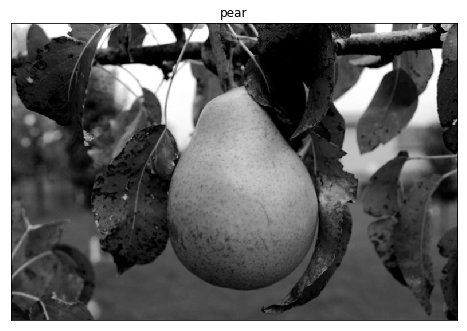

In [18]:
imshow(img_gray, "pear")

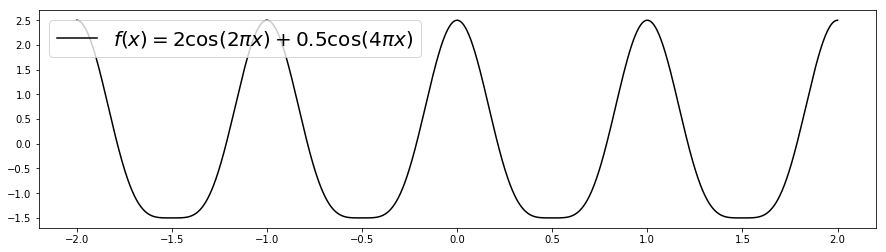

In [6]:
# Wave form used in class
x = np.linspace(-2, 2, 10000)
y = 2*np.cos(2*np.pi*x) + 1/2 * np.cos(4*np.pi*x)
plt.figure(figsize=(15,4))
plt.plot(x,y,"k")
plt.legend(["$f(x) = 2\cos(2\pi x) + 0.5\cos(4\pi x)$"], prop={"size": 20}, loc=2)

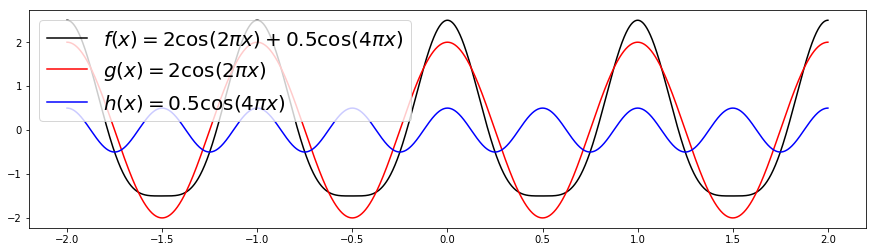

In [7]:
# Wave form used in class
x = np.linspace(-2, 2, 10000)
y = np.stack([
    2*np.cos(2*np.pi*x) + 1/2 * np.cos(4*np.pi*x),
    2*np.cos(2*np.pi*x),
    1/2 * np.cos(4*np.pi*x),
], axis=0)
legend = [
    "$f(x) = 2\cos(2\pi x) + 0.5\cos(4\pi x)$",
    "$g(x) = 2\cos(2\pi x)$",
    "$h(x) = 0.5\cos(4\pi x)$",
]
plt.figure(figsize=(15,4))
plt.plot(x,y[0],"k")
plt.plot(x,y[1],"r")
plt.plot(x,y[2],"b")
plt.legend(legend, prop={"size": 20}, loc=2)

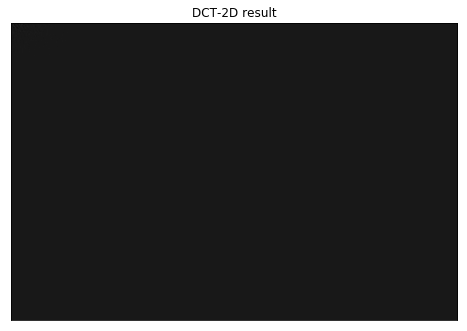

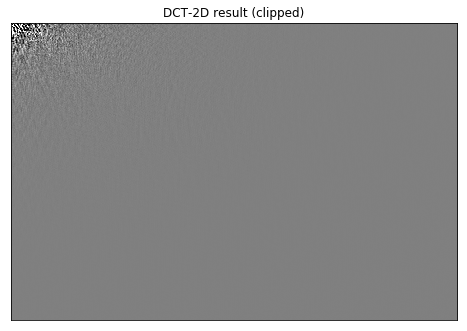

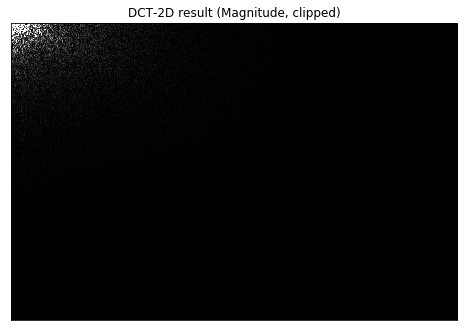

In [96]:
# DCT example
from scipy.fftpack import dct, fftshift
img_dct = dct(dct(img_gray, axis=0), axis=1)
img_res = img_dct
imagesc(img_res, "DCT-2D result")
img_clipped = img_res / img_res.std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "DCT-2D result (clipped)")
img_clipped = abs(img_res) / abs(img_res).std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(abs(img_clipped), "DCT-2D result (Magnitude, clipped)")

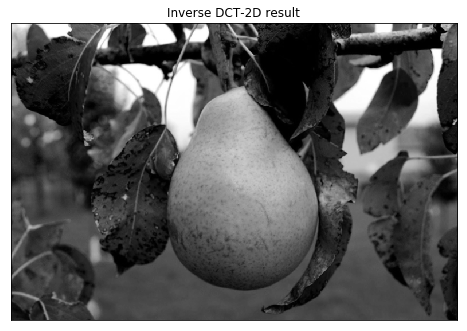

In [73]:
# Inverse DCT example
from scipy.fftpack import idct
img_idct = idct(idct(img_dct, axis=0), axis=1)
imshow(img_idct, "Inverse DCT-2D result")

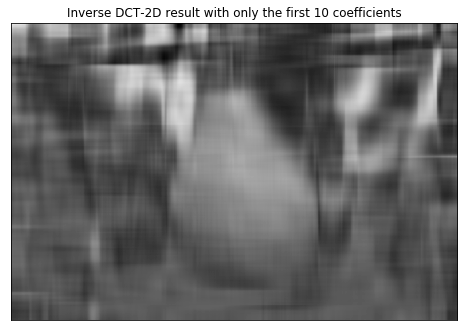

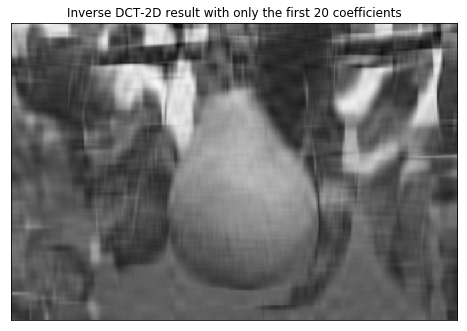

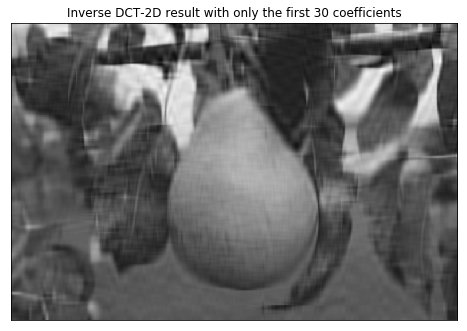

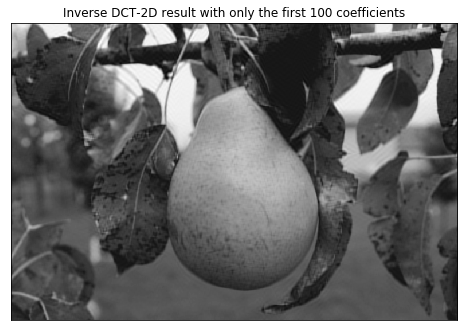

In [74]:
# Inverse DCT example, with coefficients masked
from scipy.fftpack import idct
# Removing some coeeficent (set zero)
img_dct_copy = img_dct.copy()
img_dct_copy[10:,10:] = 0
img_idct = idct(idct(img_dct_copy, axis=0), axis=1)
imshow(img_idct, "Inverse DCT-2D result with only the first 10 coefficients")
# With first 20
img_dct_copy = img_dct.copy()
img_dct_copy[20:,20:] = 0
img_idct = idct(idct(img_dct_copy, axis=0), axis=1)
imshow(img_idct, "Inverse DCT-2D result with only the first 20 coefficients")
# With first 30
img_dct_copy = img_dct.copy()
img_dct_copy[30:,30:] = 0
img_idct = idct(idct(img_dct_copy, axis=0), axis=1)
imshow(img_idct, "Inverse DCT-2D result with only the first 30 coefficients")
# With first 100
img_dct_copy = img_dct.copy()
img_dct_copy[100:,100:] = 0
img_idct = idct(idct(img_dct_copy, axis=0), axis=1)
imshow(img_idct, "Inverse DCT-2D result with only the first 100 coefficients")

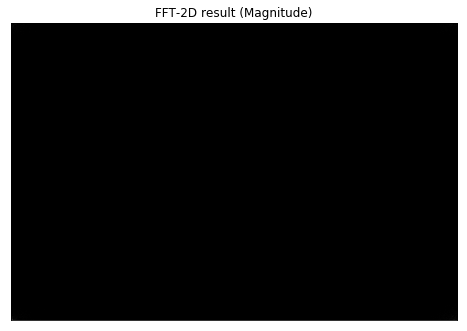

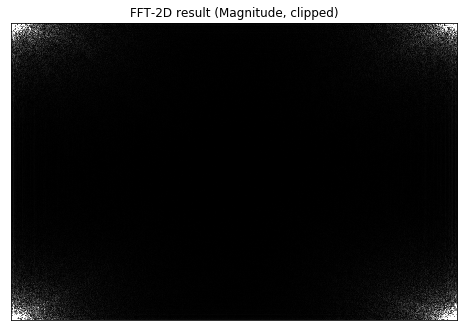

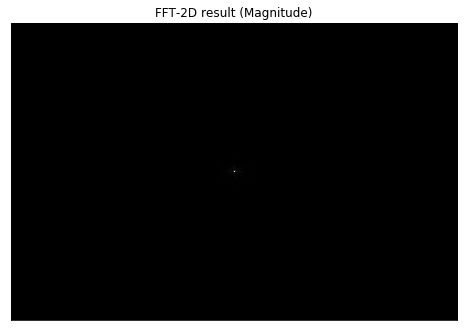

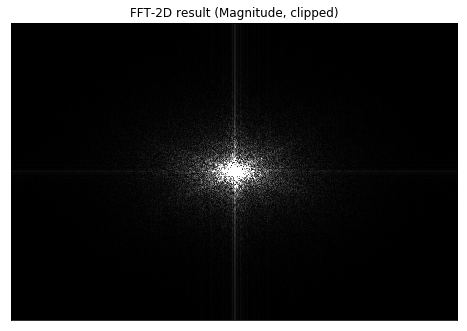

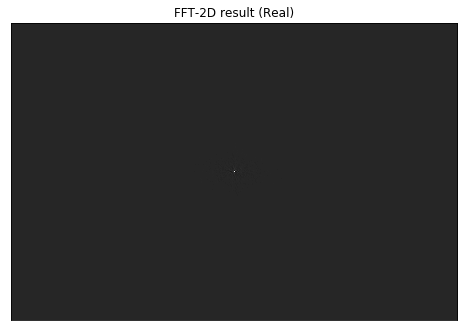

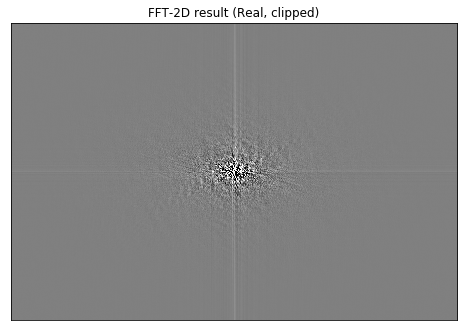

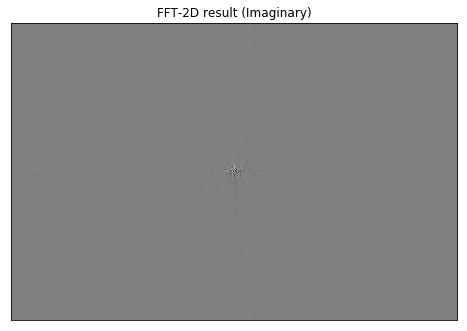

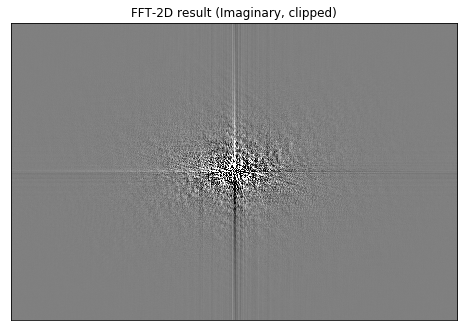

In [89]:
# DFT example
from numpy.fft import fft2
img_fft = fft2(img_gray)

# shift for better visualization
img_res = abs(img_fft)
imagesc(img_res, "FFT-2D result (Magnitude)")
img_clipped = img_res / img_res.std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "FFT-2D result (Magnitude, clipped)")

# shift for better visualization
img_fft = fftshift(fftshift(img_fft, axes=0), axes=1)
img_res = abs(img_fft)
imagesc(img_res, "FFT-2D result (Magnitude)")
img_clipped = img_res / img_res.std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "FFT-2D result (Magnitude, clipped)")

# For real
img_res = np.real(img_fft)
imagesc(img_res, "FFT-2D result (Real)")
img_clipped = img_res / img_res.std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "FFT-2D result (Real, clipped)")

# For imaginary
img_res = np.imag(img_fft)
imagesc(img_res, "FFT-2D result (Imaginary)")
img_clipped = img_res / img_res.std()
img_clipped = np.maximum(-3, np.minimum(3, img_clipped))
imshow(img_clipped, "FFT-2D result (Imaginary, clipped)")



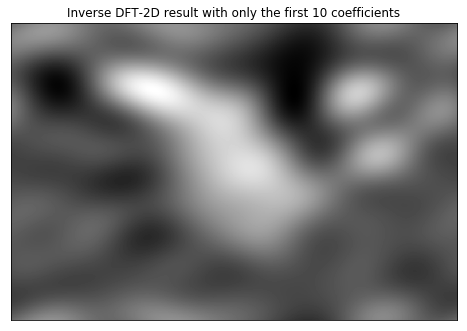

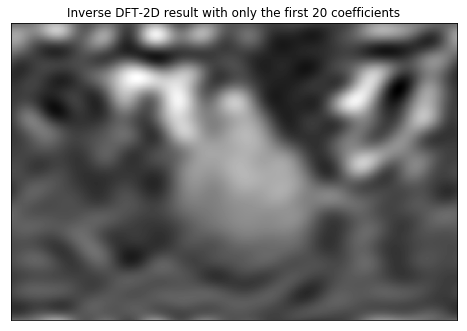

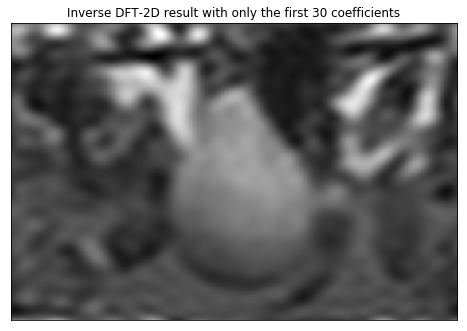

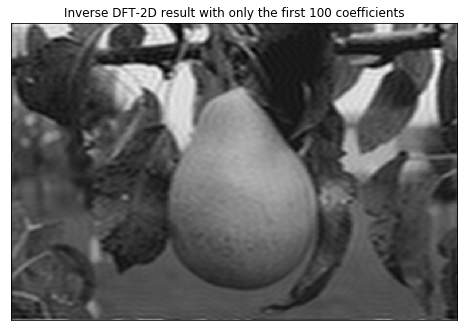

In [94]:
# Inverse DFT example, with coefficients masked
from numpy.fft import ifft2
# Mask for Removing some coeeficent (set zero)
mask = np.zeros_like(img_fft_copy)
cx = mask.shape[0] // 2
cy = mask.shape[1] // 2
img_fft_copy = img_fft.copy()
mask = np.zeros_like(img_fft_copy)
mask[cx-5:cx+5,cy-5:cy+5] = 1
img_fft_copy = fftshift(fftshift(img_fft_copy*mask, axes=0), axes=1)
img_ifft = np.real(ifft2(img_fft_copy)) # ignore imaginary parts when ifft!
imshow(img_ifft, "Inverse DFT-2D result with only the first 10 coefficients")
# With first 20
img_fft_copy = img_fft.copy()
mask = np.zeros_like(img_fft_copy)
mask[cx-10:cx+10,cy-10:cy+10] = 1
img_fft_copy = fftshift(fftshift(img_fft_copy*mask, axes=0), axes=1)
img_ifft = np.real(ifft2(img_fft_copy)) # ignore imaginary parts when ifft!
imshow(img_ifft, "Inverse DFT-2D result with only the first 20 coefficients")
# With first 30
img_fft_copy = img_fft.copy()
mask = np.zeros_like(img_fft_copy)
mask[cx-15:cx+15,cy-15:cy+15] = 1
img_fft_copy = fftshift(fftshift(img_fft_copy*mask, axes=0), axes=1)
img_ifft = np.real(ifft2(img_fft_copy)) # ignore imaginary parts when ifft!
imshow(img_ifft, "Inverse DFT-2D result with only the first 30 coefficients")
# With first 100
img_fft_copy = img_fft.copy()
mask = np.zeros_like(img_fft_copy)
mask[cx-50:cx+50,cy-50:cy+50] = 1
img_fft_copy = fftshift(fftshift(img_fft_copy*mask, axes=0), axes=1)
img_ifft = np.real(ifft2(img_fft_copy)) # ignore imaginary parts when ifft!
imshow(img_ifft, "Inverse DFT-2D result with only the first 100 coefficients")